<a href="https://colab.research.google.com/github/bharambetr2002/bharambetr2002/blob/main/1data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Preprocessing***
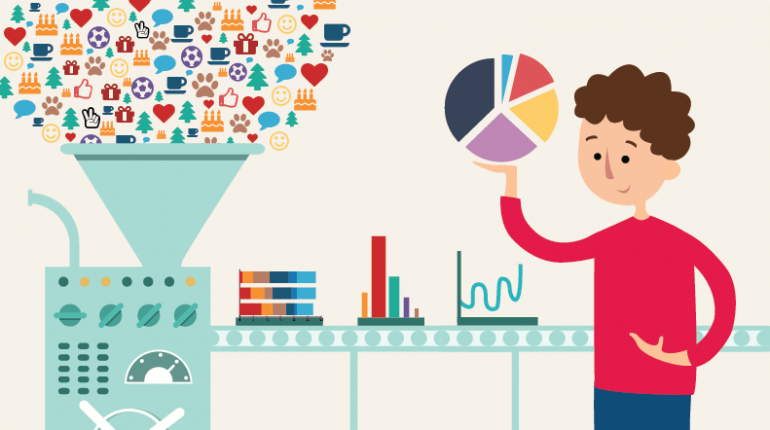

#What is data preprocessing ? Why do we need it ?

# Importing Libraries
''' Numpy: Numpy Python library is used for including any type of mathematical operation in the code. 
It is the fundamental package for scientific calculation in Python. 
It also supports to add large, multidimensional arrays and matrices.'''

'''Pandas: The Pandas library, which is one of the most famous Python libraries and used for importing and managing the datasets. 
It is an open-source data manipulation and analysis library. '''

In [ ]:
import numpy as np
import pandas as pd


#Importing the Dataset

In [ ]:

dataset = pd.read_csv('data1.csv')
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  50.0  83000.0        No
11   France  37.0  67000.0       Yes
12      NaN  45.0  22000.0       NaN


# Handling Duplicate Data
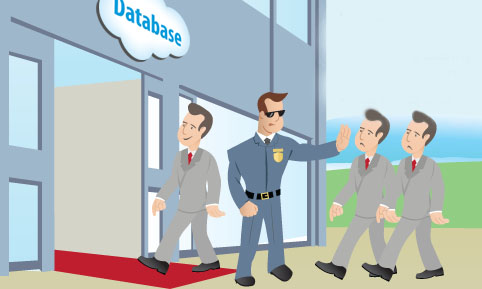

In [ ]:
# Prints the top few rows of the Dataset...
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
# Function use to get stats about the
dataset.describe()

,Age,Salary
count,12.000000,12.000000
mean,40.083333,62166.666667
std,7.513120,17314.383581
min,27.000000,22000.000000
25%,36.500000,53500.000000
50%,39.000000,64000.000000
75%,45.750000,73750.000000
max,50.000000,83000.000000


In [ ]:
# Remove Duplicates
dataset = dataset.drop_duplicates()
print(dataset)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
12      NaN  45.0  22000.0       NaN


In [ ]:
# Function use to get stats about the dataset...
dataset.describe()

,Age,Salary
count,10.000000,10.000000
mean,39.400000,59600.000000
std,7.515909,17557.524503
min,27.000000,22000.000000
25%,35.500000,52500.000000
50%,39.000000,59500.000000
75%,44.750000,70750.000000
max,50.000000,83000.000000


#Handling Missing Data
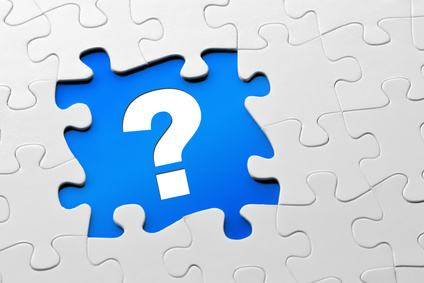

In [ ]:
# Checking blank Values
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [ ]:
# Checking null values category wise
dataset.isnull().sum()

Country      1
Age          1
Salary       1
Purchased    1
dtype: int64

In [ ]:
# Dropping categorical data rows with missing values
dataset.dropna(how='any', subset=['Country', 'Purchased'], inplace=True)

In [ ]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Checking null values category wise
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
# Splitting dataset into independent & dependent variable
X = dataset[['Country', 'Age', 'Salary']].values
y = dataset['Purchased'].values
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


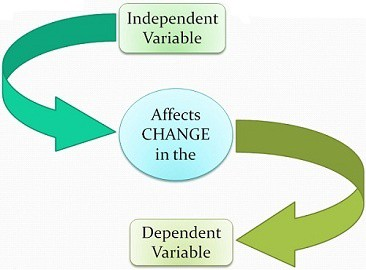

In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
from sklearn.impute import SimpleImputer
print(X[:, 1:3]) 

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 nan]
 [35.0 58000.0]
 [nan 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X[:, 1:3])

[[44.0 72000.0]
 [27.0 48000.0]
 [30.0 54000.0]
 [38.0 61000.0]
 [40.0 63777.77777777778]
 [35.0 58000.0]
 [38.77777777777778 52000.0]
 [48.0 79000.0]
 [50.0 83000.0]
 [37.0 67000.0]]


# Handling Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('enconder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


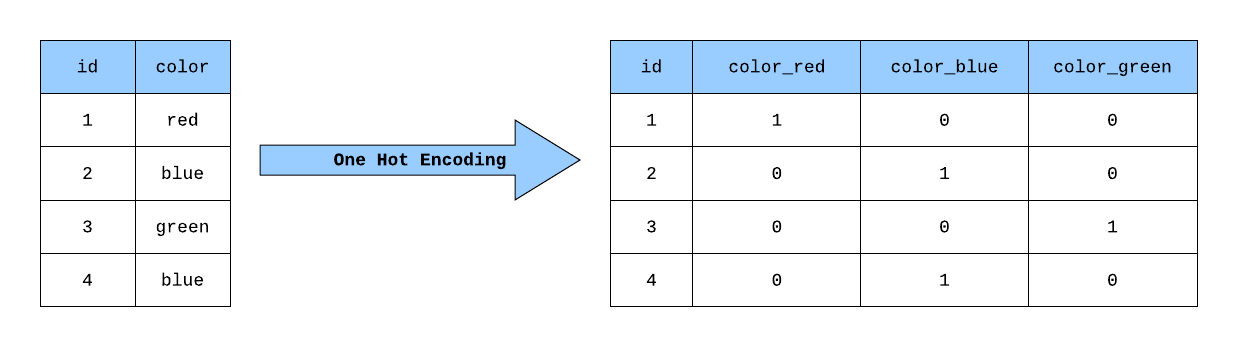

In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


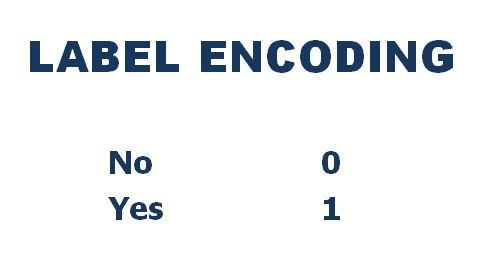

In [ ]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


#Splitting Data for Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(X_train)

[[1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 50.0 83000.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 1.0 27.0 48000.0]]


In [ ]:
print(y_train)

[1 0 1 0 0 0 1 0]


In [ ]:
print(y_test)

[1 1]


# Feature Scaling




In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 4:] = sc.fit_transform(X_train[:, 4:])

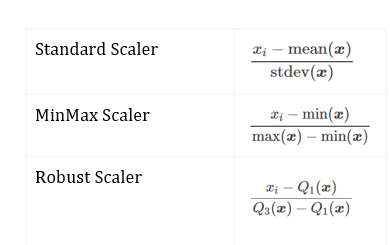

In [ ]:
print(X_train)

[[1.0 0.0 0.0 35.0 -0.7213204519277457]
 [1.0 0.0 0.0 44.0 0.5817100418772143]
 [1.0 0.0 0.0 48.0 1.2332252887796944]
 [0.0 1.0 0.0 30.0 -1.093614878729163]
 [0.0 0.0 1.0 38.0 -0.4420996318266829]
 [0.0 0.0 1.0 38.77777777777778 -1.2797620921298716]
 [1.0 0.0 0.0 37.0 0.11634200837544287]
 [0.0 1.0 0.0 50.0 1.6055197155811116]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 1.0 27.0 48000.0]]


In [ ]:
X_test[:, 4:] = sc.transform(X_test[:, 4:])
print(X_test)

[[0.0 1.0 0.0 40.0 -0.18356183543680957]
 [0.0 0.0 1.0 27.0 -1.6520565189312888]]
